In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HR_Unstructured_Dataset_10000_Rows.csv")

In [3]:
df.shape

(10000, 18)

In [4]:
df.head()

,Employee_ID,Employee_Name,Gender,Age,Department,Job_Title,Location,Joining_Date,Last_Promotion_Date,Employment_Type,Experience_Years,Education_Level,Performance_Rating,Monthly_Salary,Overtime_Hours,Absenteeism_Days,Manager_ID,Attrition_Status
0,1001,Emp_0,M,43,HR,QA Engineer,Mumbai,2021-12-21,2019-03-12,Intern,6.9,PhD,2.0,151858,9,17,842,N
1,1002,Emp_1,F,21,HR,Data Analyst,Mumbai,2023-12-03,2025-02-05,Full-Time,11.4,Bachelors,5.0,37300,10,7,870,Yes
2,1003,Emp_2,Other,59,R&D,QA Engineer,Mumbai,2016-10-15,2019-08-17,CT,16.2,NaN,NaN,160496,19,13,809,No
3,1004,Emp_3,F,39,Finance,Intern,Delhi,2024-06-05,2021-05-11,FT,3.7,Masters,4.0,34349,37,13,653,No
4,1005,Emp_4,F,53,IT,Data Analyst,Delhi,2015-05-18,2019-11-18,Contract,16.6,PhD,3.0,113286,22,3,629,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_ID          10000 non-null  int64  
 1   Employee_Name        10000 non-null  object 
 2   Gender               8343 non-null   object 
 3   Age                  10000 non-null  int64  
 4   Department           10000 non-null  object 
 5   Job_Title            10000 non-null  object 
 6   Location             8519 non-null   object 
 7   Joining_Date         10000 non-null  object 
 8   Last_Promotion_Date  10000 non-null  object 
 9   Employment_Type      10000 non-null  object 
 10  Experience_Years     10000 non-null  float64
 11  Education_Level      8394 non-null   object 
 12  Performance_Rating   8286 non-null   float64
 13  Monthly_Salary       10000 non-null  int64  
 14  Overtime_Hours       10000 non-null  int64  
 15  Absenteeism_Days     10000 non-null  

In [6]:
df_clean = df.copy()

In [ ]:
# ===============================
# 🧹 DATA CLEANING & PREPARATION
# ===============================

In [7]:
# Q1 – Standardize Gender values and handle missing

df_clean["Gender_clean"] = (
    df_clean["Gender"]
        .astype(str)                  # avoid errors due to NaN
        .str.strip()                  # remove spaces
        .str.lower()                  # normalize case
        .replace({
            "m": "Male",
            "male": "Male",
            "f": "Female",
            "female": "Female",
            "other": "Other",
            "nan": np.nan
        })
)

# Fill missing values with business-friendly label
df_clean["Gender_clean"] = df_clean["Gender_clean"].fillna("Unknown")

# Check result
df_clean["Gender_clean"].value_counts(dropna=False)

Gender_clean
Female     3381
Male       3337
Unknown    1657
Other      1625
Name: count, dtype: int64

In [8]:
# Q2 – Standardize employment type labels

df_clean["Employment_Type_clean"] = (
    df_clean["Employment_Type"]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "ft": "Full-Time",
            "full-time": "Full-Time",
            "ct": "Contract",
            "contract": "Contract",
            "intern": "Intern",
            "part-time": "Part-Time",
            "nan": np.nan
        })
)

# Fill missing values
df_clean["Employment_Type_clean"] = df_clean["Employment_Type_clean"].fillna("Unknown")

# Check result
df_clean["Employment_Type_clean"].value_counts(dropna=False)

Employment_Type_clean
Contract     3351
Full-Time    3340
Part-Time    1660
Intern       1649
Name: count, dtype: int64

In [9]:
# Q3 – Standardize attrition labels for retention analysis

df_clean["Attrition_clean"] = (
    df_clean["Attrition_Status"]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "y": "Yes",
            "yes": "Yes",
            "n": "No",
            "no": "No",
            "nan": np.nan
        })
)

# Fill missing values
df_clean["Attrition_clean"] = df_clean["Attrition_clean"].fillna("Unknown")

# Check result
df_clean["Attrition_clean"].value_counts(dropna=False)

Attrition_clean
No     5101
Yes    4899
Name: count, dtype: int64

In [10]:
# Q4 – Education cleaning

df_clean["Education_clean"] = (
    df_clean["Education_Level"]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "graduate": "Bachelors",
            "bachelors": "Bachelors",
            "masters": "Masters",
            "phd": "PhD",
            "diploma": "Diploma",
            "nan": np.nan
        })
)

df_clean["Education_clean"] = df_clean["Education_clean"].fillna("Unknown")

In [11]:
# Q4 – Location cleaning

df_clean["Location_clean"] = (
    df_clean["Location"]
        .astype(str)
        .str.strip()
        .str.title()
        .replace({"Nan": np.nan})
)

df_clean["Location_clean"] = df_clean["Location_clean"].fillna("Unknown")

In [12]:
# Q4 – Performance rating cleaning

df_clean["Performance_Rating_clean"] = pd.to_numeric(
    df_clean["Performance_Rating"],
    errors="coerce"
)

# Only allow ratings from 1 to 5
df_clean.loc[
    ~df_clean["Performance_Rating_clean"].between(1, 5),
    "Performance_Rating_clean"
] = np.nan

In [13]:
# Check missing values after cleaning Q4
df_clean[[
    "Education_clean",
    "Location_clean",
    "Performance_Rating_clean"
]].isna().sum()

Education_clean                0
Location_clean                 0
Performance_Rating_clean    1714
dtype: int64

In [14]:
# Q5 – Age must be between 18 and 65
df_clean.loc[
    (df_clean["Age"] < 18) | (df_clean["Age"] > 65),
    "Age"
] = np.nan

In [15]:
# Experience cannot be negative
df_clean.loc[
    df_clean["Experience_Years"] < 0,
    "Experience_Years"
] = np.nan

In [16]:
# Experience cannot be greater than (Age - 18)
df_clean.loc[
    df_clean["Experience_Years"] > (df_clean["Age"] - 18),
    "Experience_Years"
] = np.nan

In [17]:
# Validate age and experience
df_clean[["Age", "Experience_Years"]].describe()

,Age,Experience_Years
count,10000.000000,7827.000000
mean,39.307400,9.050505
std,11.432951,5.670789
min,20.000000,0.000000
25%,29.000000,4.100000
50%,39.000000,8.600000
75%,49.000000,13.800000
max,59.000000,20.000000


In [18]:
df_clean.isna().sum()

Employee_ID                    0
Employee_Name                  0
Gender                      1657
Age                            0
Department                     0
Job_Title                      0
Location                    1481
Joining_Date                   0
Last_Promotion_Date            0
Employment_Type                0
Experience_Years            2173
Education_Level             1606
Performance_Rating          1714
Monthly_Salary                 0
Overtime_Hours                 0
Absenteeism_Days               0
Manager_ID                     0
Attrition_Status               0
Gender_clean                   0
Employment_Type_clean          0
Attrition_clean                0
Education_clean                0
Location_clean                 0
Performance_Rating_clean    1714
dtype: int64

In [19]:
# Q6
# Count employees by department

dept_headcount = df_clean["Department"].value_counts()

# Count employees by cleaned location
location_headcount = df_clean["Location_clean"].value_counts()

dept_headcount, location_headcount

(Department
 Marketing     1295
 Support       1270
 HR            1263
 R&D           1248
 IT            1241
 Sales         1234
 Operations    1231
 Finance       1218
 Name: count, dtype: int64,
 Location_clean
 Unknown      1481
 Chennai      1471
 Mumbai       1452
 Delhi        1407
 Pune         1404
 Hyderabad    1398
 Bangalore    1387
 Name: count, dtype: int64)

In [20]:
# Q7
# Cross-tabulation to compare gender counts inside each department

pd.crosstab(
    df_clean["Department"],
    df_clean["Gender_clean"]
)

Gender_clean,Female,Male,Other,Unknown
Department,,,,
Finance,403,393,206,216
HR,431,411,210,211
IT,397,401,226,217
Marketing,450,452,185,208
Operations,419,422,190,200
R&D,421,422,216,189
Sales,439,402,181,212
Support,421,434,211,204


In [21]:
# Q8
# Identify most common job roles in the company

df_clean["Job_Title"].value_counts().head(10)

Job_Title
Product Manager      1356
HR Executive         1259
Manager              1252
DevOps Engineer      1248
Intern               1242
Data Analyst         1231
QA Engineer          1221
Software Engineer    1191
Name: count, dtype: int64

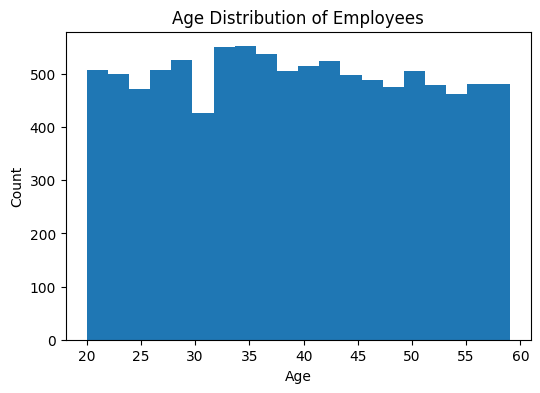

In [22]:
# Q9
# Visualize age distribution to understand workforce demographics

plt.figure(figsize=(6,4))
plt.hist(df_clean["Age"].dropna(), bins=20)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [23]:
# Q10
# Percentage distribution of employees by employment type

df_clean["Employment_Type_clean"].value_counts(normalize=True) * 100

Employment_Type_clean
Contract     33.51
Full-Time    33.40
Part-Time    16.60
Intern       16.49
Name: proportion, dtype: float64

In [24]:
# Q11
# Calculate salary statistics by department
# This helps HR understand pay structure across departments

df_clean.groupby("Department")["Monthly_Salary"].agg(
    average_salary="mean",
    median_salary="median",
    min_salary="min",
    max_salary="max"
)

,average_salary,median_salary,min_salary,max_salary
Department,,,,
Finance,108640.380131,108689.5,20055,199798
HR,107468.201900,107953.0,20071,199826
IT,113465.788074,114625.0,20253,199971
Marketing,111255.608494,110069.0,20159,199926
Operations,110192.598700,110768.0,20168,199991
R&D,109612.030449,109074.0,20245,199860
Sales,110133.437601,109633.5,20199,199979
Support,110721.187402,111476.5,20199,199957


In [25]:
# Q12
# Identify job roles with the highest average compensation

(
    df_clean
    .groupby("Job_Title")["Monthly_Salary"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

Job_Title
Product Manager      111621.733038
Manager              111010.423323
Data Analyst         110706.677498
Software Engineer    110221.129303
Intern               109996.081320
QA Engineer          109372.228501
DevOps Engineer      109236.737981
HR Executive         109232.226370
Name: Monthly_Salary, dtype: float64

In [26]:
# Q13
# Compare average salary across different locations

(
    df_clean
    .groupby("Location_clean")["Monthly_Salary"]
    .mean()
    .sort_values(ascending=False)
)

Location_clean
Hyderabad    112791.896280
Pune         111507.697293
Delhi        111147.596304
Chennai      109969.365738
Mumbai       109481.345041
Bangalore    109065.153569
Unknown      107546.986496
Name: Monthly_Salary, dtype: float64

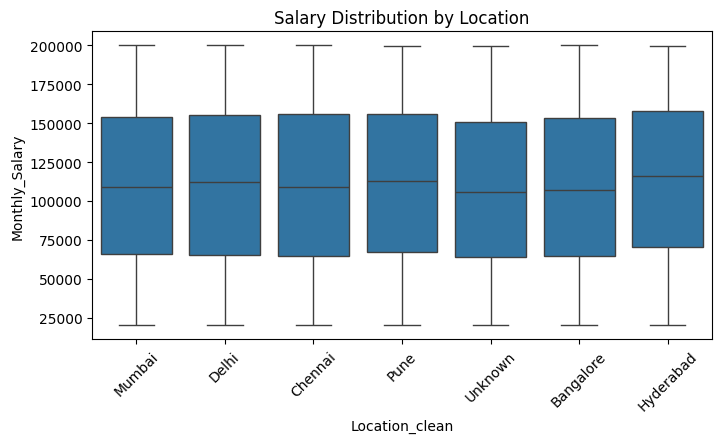

In [27]:
# Visual comparison of salary distribution across locations

plt.figure(figsize=(8,4))
sns.boxplot(
    data=df_clean,
    x="Location_clean",
    y="Monthly_Salary"
)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Location")
plt.show()

In [28]:
# Q14
# Measure linear relationship between experience and salary

df_clean[["Experience_Years", "Monthly_Salary"]].corr()

,Experience_Years,Monthly_Salary
Experience_Years,1.000000,0.007676
Monthly_Salary,0.007676,1.000000


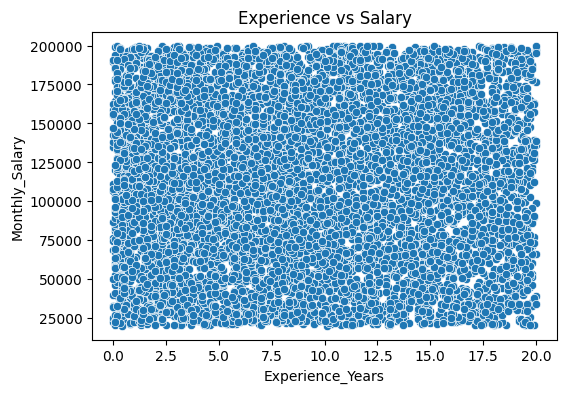

In [29]:
# Visual inspection of experience vs salary

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_clean,
    x="Experience_Years",
    y="Monthly_Salary"
)
plt.title("Experience vs Salary")
plt.show()

In [30]:
# Q15
# Compare average salary across performance ratings

df_clean.groupby("Performance_Rating_clean")["Monthly_Salary"].mean()

Performance_Rating_clean
1.0    111022.866509
2.0    110673.123288
3.0    108634.539598
4.0    111837.833437
5.0    109222.284698
Name: Monthly_Salary, dtype: float64

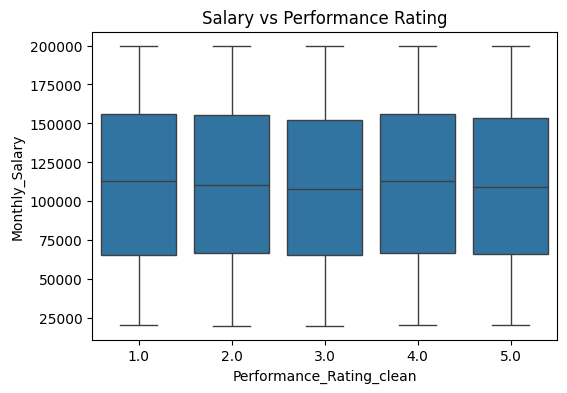

In [31]:
# Visualize salary spread by performance rating

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_clean,
    x="Performance_Rating_clean",
    y="Monthly_Salary"
)
plt.title("Salary vs Performance Rating")
plt.show()

In [32]:
# Q16
# Calculate average performance rating for each department
# This helps identify high-performing and low-performing departments

df_clean.groupby("Department")["Performance_Rating_clean"].mean()

Department
Finance       3.018943
HR            3.033432
IT            3.000000
Marketing     3.031876
Operations    3.058824
R&D           2.966856
Sales         3.016782
Support       2.865458
Name: Performance_Rating_clean, dtype: float64

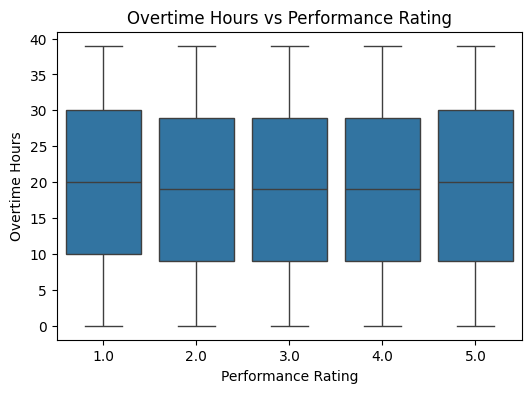

In [33]:
# Q17
# Compare overtime hours across different performance ratings
# This helps understand whether higher performers work more overtime

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_clean,
    x="Performance_Rating_clean",
    y="Overtime_Hours"
)
plt.title("Overtime Hours vs Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Overtime Hours")
plt.show()

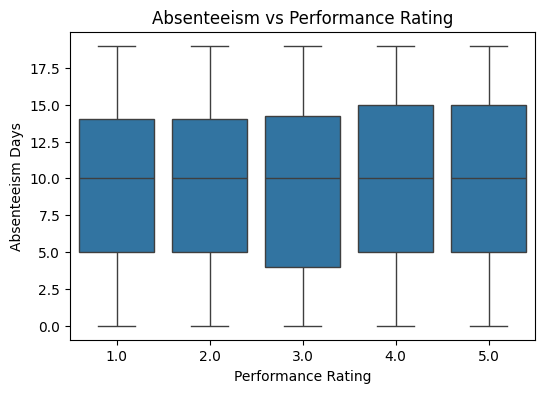

In [34]:
# Q18
# Compare absenteeism days across performance ratings
# This shows whether poor attendance is associated with lower performance

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_clean,
    x="Performance_Rating_clean",
    y="Absenteeism_Days"
)
plt.title("Absenteeism vs Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Absenteeism Days")
plt.show()

In [35]:
# Q19
# Compare average performance ratings across employment types
# This helps check if contract or full-time employees perform differently

df_clean.groupby("Employment_Type_clean")["Performance_Rating_clean"].mean()

Employment_Type_clean
Contract     2.938156
Full-Time    3.064958
Intern       2.972243
Part-Time    3.013034
Name: Performance_Rating_clean, dtype: float64

In [36]:
# Q20
# Calculate percentage of employees who left vs stayed
# This gives the overall attrition rate of the company

df_clean["Attrition_clean"].value_counts(normalize=True) * 100

Attrition_clean
No     51.01
Yes    48.99
Name: proportion, dtype: float64

In [37]:
# Q21
# Calculate department-wise attrition percentage
# normalize='index' gives percentage within each department

pd.crosstab(
    df_clean["Department"],
    df_clean["Attrition_clean"],
    normalize="index"
) * 100

Attrition_clean,No,Yes
Department,,
Finance,55.418719,44.581281
HR,50.356295,49.643705
IT,49.637389,50.362611
Marketing,50.656371,49.343629
Operations,49.715678,50.284322
R&D,48.397436,51.602564
Sales,52.593193,47.406807
Support,51.417323,48.582677


In [38]:
# Q22
# Compare average salary of employees who left vs stayed

df_clean.groupby("Attrition_clean")["Monthly_Salary"].mean()

Attrition_clean
No     110190.587728
Yes    110190.786487
Name: Monthly_Salary, dtype: float64

In [39]:
# Q23
# Compare average experience for employees who left vs stayed

df_clean.groupby("Attrition_clean")["Experience_Years"].mean()

Attrition_clean
No     9.019352
Yes    9.083316
Name: Experience_Years, dtype: float64

In [40]:
# Q24
# Attrition distribution across performance ratings

pd.crosstab(
    df_clean["Performance_Rating_clean"],
    df_clean["Attrition_clean"],
    normalize="index"
) * 100

Attrition_clean,No,Yes
Performance_Rating_clean,,
1.0,50.620201,49.379799
2.0,51.058531,48.941469
3.0,51.477541,48.522459
4.0,52.019888,47.980112
5.0,50.533808,49.466192


In [41]:
# Q24
# Compare overtime hours between employees who left and stayed

df_clean.groupby("Attrition_clean")["Overtime_Hours"].mean()

Attrition_clean
No     19.347775
Yes    19.515207
Name: Overtime_Hours, dtype: float64

In [43]:
# Convert Last_Promotion_Date to datetime
# This is required before doing date arithmetic

df_clean["Last_Promotion_Date"] = pd.to_datetime(
    df_clean["Last_Promotion_Date"],
    errors="coerce"
)

In [44]:
# Q25
# Calculate number of years since last promotion for each employee
# This metric is used to study career progression and stagnation

df_clean["Years_Since_Promotion"] = (
    (pd.Timestamp.today() - df_clean["Last_Promotion_Date"])
    .dt.days / 365
)

In [45]:
# Q25
# Average promotion gap for each department
# Helps identify departments with slower or faster career growth

(
    df_clean
    .groupby("Department")["Years_Since_Promotion"]
    .mean()
    .sort_values(ascending=False)
)

Department
Marketing     5.013618
Operations    5.004807
HR            5.003655
IT            4.986683
Finance       4.985422
Support       4.981715
R&D           4.942404
Sales         4.894878
Name: Years_Since_Promotion, dtype: float64

In [46]:
# Q25
# Compare promotion gap for employees who left vs stayed
# Helps understand if delayed promotions are linked to attrition

df_clean.groupby("Attrition_clean")["Years_Since_Promotion"].mean()

Attrition_clean
No     4.970113
Yes    4.983980
Name: Years_Since_Promotion, dtype: float64

In [47]:
# ✅ 1. Headcount by department (Bar Plot)

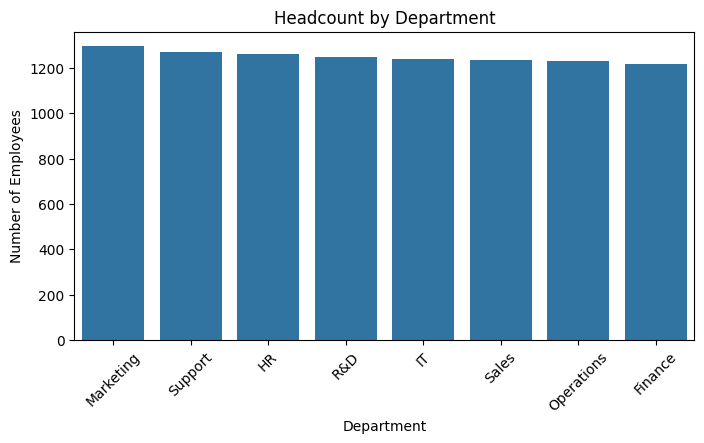

In [62]:
# Headcount by department
# Shows workforce distribution across departments

dept_counts = df_clean["Department"].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(
    x=dept_counts.index,
    y=dept_counts.values
)
plt.title("Headcount by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

In [49]:
# ✅ 2. Salary distribution (Histogram + Boxplot)

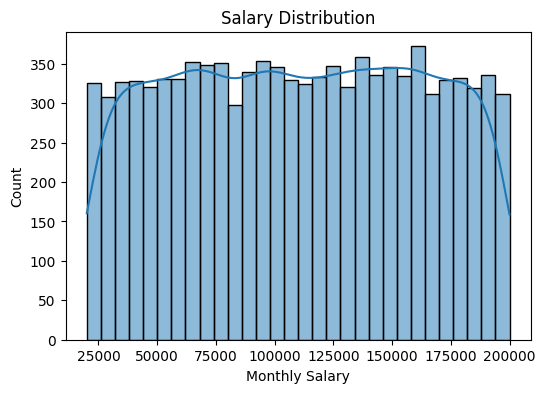

In [50]:
# Salary distribution (histogram)
# Shows overall salary spread and skewness

plt.figure(figsize=(6,4))
sns.histplot(
    df_clean["Monthly_Salary"].dropna(),
    bins=30,
    kde=True
)
plt.title("Salary Distribution")
plt.xlabel("Monthly Salary")
plt.ylabel("Count")
plt.show()

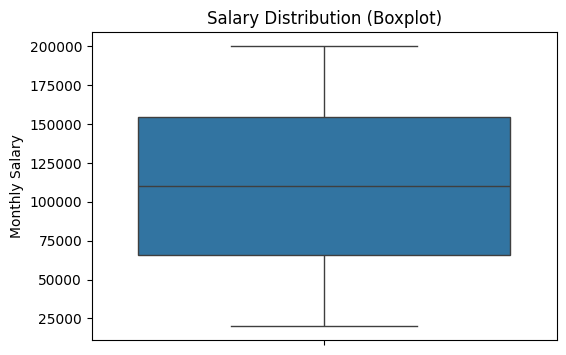

In [51]:
# Salary distribution (boxplot)
# Highlights outliers and salary spread

plt.figure(figsize=(6,4))
sns.boxplot(
    y=df_clean["Monthly_Salary"]
)
plt.title("Salary Distribution (Boxplot)")
plt.ylabel("Monthly Salary")
plt.show()

In [52]:
# ✅ 3. Experience vs Salary (Scatter Plot)

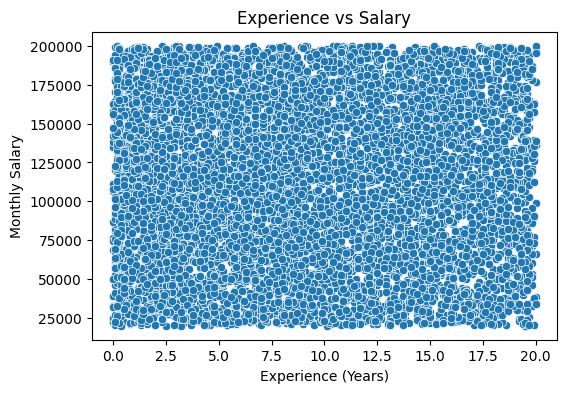

In [53]:
# Relationship between experience and salary
# Used to identify growth patterns and anomalies

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_clean,
    x="Experience_Years",
    y="Monthly_Salary"
)
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Monthly Salary")
plt.show()

In [54]:
# ✅ 4. Attrition by department (Bar Plot)

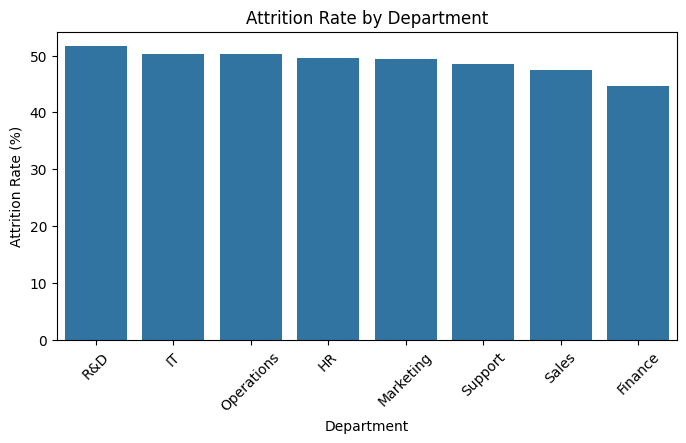

In [55]:
# Attrition percentage by department
# Shows which departments are losing more employees

attrition_dept = (
    pd.crosstab(
        df_clean["Department"],
        df_clean["Attrition_clean"],
        normalize="index"
    ) * 100
)

# Keep only 'Yes' (employees who left)
attrition_yes = attrition_dept["Yes"].sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x=attrition_yes.index,
    y=attrition_yes.values
)
plt.title("Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [56]:
# ✅ 5. Performance vs overtime (Box Plot)

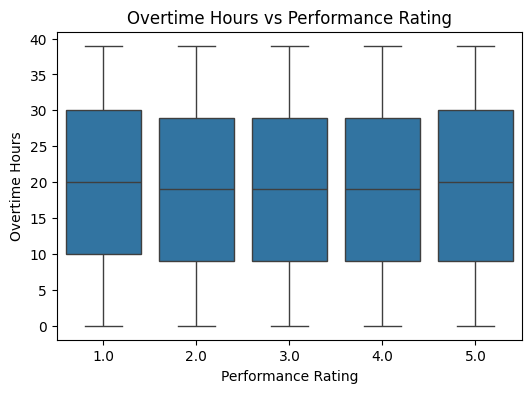

In [57]:
# Performance vs overtime hours
# Shows whether higher performance is associated with more overtime

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_clean,
    x="Performance_Rating_clean",
    y="Overtime_Hours"
)
plt.title("Overtime Hours vs Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Overtime Hours")
plt.show()

In [58]:
# ✅ 6. Absenteeism vs performance (Box Plot)

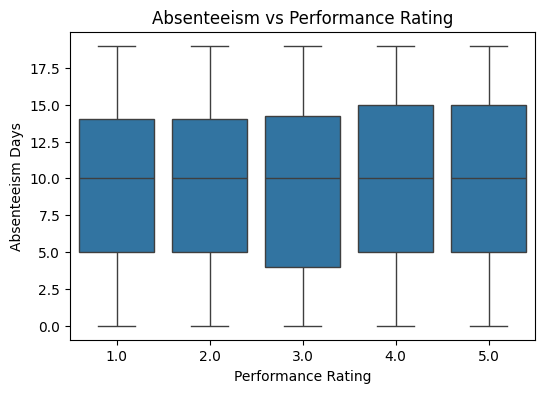

In [59]:
# Absenteeism vs performance
# Shows how attendance relates to performance levels

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_clean,
    x="Performance_Rating_clean",
    y="Absenteeism_Days"
)
plt.title("Absenteeism vs Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Absenteeism Days")
plt.show()

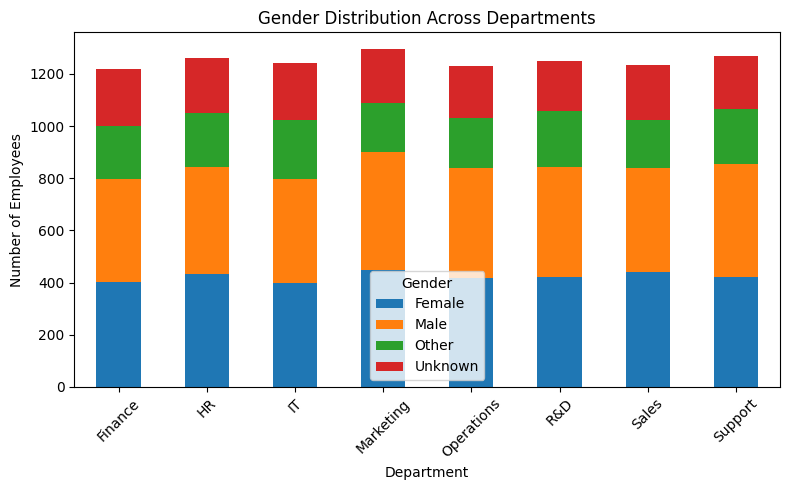

In [63]:
# Gender distribution across departments (stacked bar chart)
# This shows how male/female/other employees are distributed inside each department

# Step 1: Create a count table
gender_dept = pd.crosstab(
    df_clean["Department"],
    df_clean["Gender_clean"]
)

# Step 2: Plot stacked bar chart
gender_dept.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.title("Gender Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()